# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [1]:
#Get the libraries to be used to get and manipulate the data
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read sheet 2 of the excel file into the variable 'existing_employees'
existing_employees = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',
sheet_name='Existing employees')
existing_employees.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low


In [3]:
#read sheet 3 of the excel file into the variable 'left_employees'
left_employees = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',
sheet_name='Employees who have left')
left_employees.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low


Let's take a look at the left_employees table

In [4]:
print(left_employees.shape)
left_employees.info()

(3571, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   float64
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   float64
 4   average_montly_hours   3571 non-null   float64
 5   time_spend_company     3571 non-null   float64
 6   Work_accident          3571 non-null   float64
 7   promotion_last_5years  3571 non-null   float64
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(8), object(2)
memory usage: 279.1+ KB


The 'shape' command shows us we have 3,571 records and 10 columns in the left_employees table. Exploring further with the info() command, we observed that there are no null values and the datatypes  are correct. Next, we will take a look at the summary statistics of the columns with quantitative data

In [5]:
#looking at the summary statistics of the left_employees dataframe
left_employees.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


By observing the measures in the summary statistics table, we can deduce that some  features have some degree of skewness in their distribution. We can go a bit further to confirm that by checking the skewness with the .skew() method.

<table>
    <tr>
        <td colspan="2" ><strong>Skew Value (x)	Description of Data</strong></td>
    </tr>
    <tr>
        <td>-0.5 &lt x &lt 0.5</td>
        <td>Fairly Symmetrical</td>        
    </tr>
    <tr>
        <td>-1 &lt x &lt -0.5</td>
        <td>Moderate Negative Skew</td>
    </tr>
    <tr>
        <td>0.5 &lt x &lt 1</td> 
        <td>Moderate Positive Skew</td>
    </tr>
    <tr>
        <td>x &lt -1</td>
        <td>High Negative Skew</td>
    </tr>
    <tr>
        <td>x &gt 1</td>
        <td>High Positve Skew</td>
    </tr>
</table>

In [6]:
#remove 'Emp ID','dept' and 'salary' from the columns to test for skewness
col = left_employees.columns.tolist()
col = [x for x in col if x not in ['Emp ID','dept','salary']]

In [7]:
left_employees[col].skew()

satisfaction_level        0.291881
last_evaluation          -0.013859
number_project            0.246333
average_montly_hours      0.055009
time_spend_company        0.529610
Work_accident             4.265576
promotion_last_5years    13.605448
dtype: float64

The features <strong>satisfaction_level, last_evaluation, number_project</strong> and  <strong>average_montly_hours</strong> can be said to be fairly symmetrical. <strong>average_montly_hours,</strong> and <strong>time_spend_company</strong> are moderately skewed in the positive direction. While <strong>promotion_last_5years</strong> and <strong>Work_accident</strong> has a high positive skew.

Kurtosis is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers. Lets check for possible outliers

In [8]:
left_employees[col].kurtosis()

satisfaction_level        -1.032823
last_evaluation           -1.709550
number_project            -1.499311
average_montly_hours      -1.628109
time_spend_company        -0.800717
Work_accident             16.204214
promotion_last_5years    183.210823
dtype: float64

This indicates a lack of outliers for all features except for <strong>Work_accident</strong> and <strong>promotion_last_5years</strong> that seem to have outliers but don't because it's a binary data(contains only 1s & 0s) as indicated below:

In [9]:
#print unique values from Work_accident and promotion_last_5years
print(left_employees['Work_accident'].unique())
print(left_employees['promotion_last_5years'].unique())

[0. 1.]
[0. 1.]


Let's observe graphically the quantitative feauture distribution of resigned staff so we can visually inspect the trends

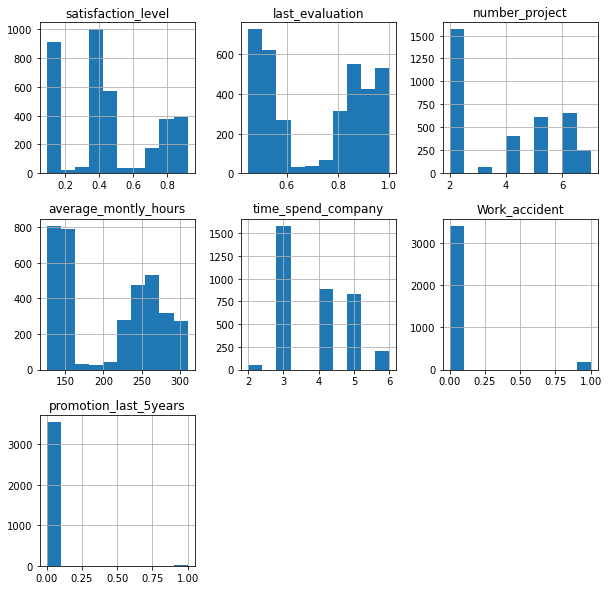

In [10]:
left_employees[col].hist(figsize=(10,10));

We can also observe the distribution for the categorical variables "dept" and "salary" in the left_employees table below:

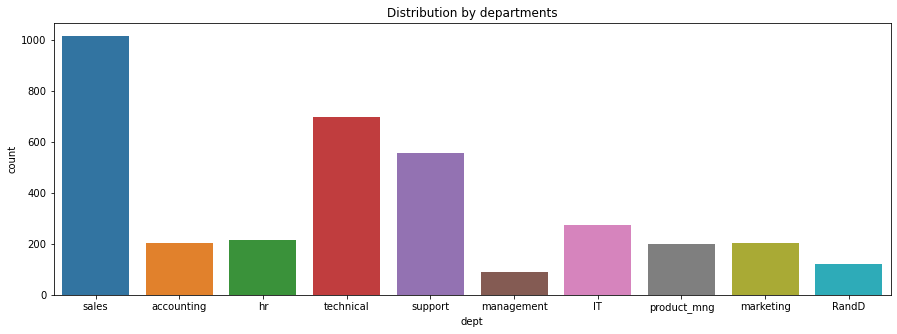

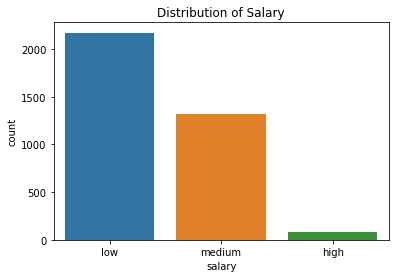

In [11]:
plt.figure(figsize=(15, 5))
plt.title('Distribution by departments')
sns.countplot(x='dept', data=left_employees)
#left_employees['dept'].plot(kind='hist', figsize=(20, 10));
plt.show();
plt.title('Distribution of Salary')
sns.countplot(x='salary', data=left_employees)
plt.show();

From the distribution plots above, we can deduce the following hypothesis for staff that left the company.
* Those that weren't promoted in the last 5 years left the company
* Those that has no work accidents left the company
* Those that stayed more than 2years left the company
* Those that spent below 170 and above 220 average monthly hours left the company
* Those that handled below 3 projects and those that handles more than 4 projects left
* Both high performers(those that scores above 0.7) and low performers(those that scored less than 0.6) in the last evaluation left the company
* there is little correlation between leaving the company and satisfaction level score below 0.5
* More staff that left the company are from Sales, Technical and Support
* Many of those that left earned medium to low salary


We will compare these assumptions with the features in the existing_employees dataset to see if it is valid.

## 1. What type of employees are leaving?

We will now test our hypothesis one after the other before drawing a conclusion on why employees are leaving the company

We'll use multivariate/regression analysis  to determine which of the features that corelates to staff leaving the company. But before we can do that, we need to do the following:
* Create a new feature called "exit_status" that shows if a staff in the company "0" or has left "1"
* we merge the two tables - existing_employees and left_employees.
* convert the salary column to integer with 1=="low", 2=="memdium" and 3=="high".
* We will use dummy variable encoding to convert the categorical variables- dept and salary to categorical variables

In [12]:
#Create a new column called "exit_status" that shows if a staff has left the company "1"
left_employees['exit_status'] = 1
left_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,exit_status
0,1.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0,sales,low,1
1,2.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0,sales,medium,1
2,3.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0,sales,medium,1
3,4.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0,sales,low,1
4,5.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0,sales,low,1


In [13]:
#Create a new column called "exit_status" that shows if a staff haven't left the company "0"
existing_employees['exit_status'] = 0
existing_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,exit_status
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,sales,low,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,sales,low,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,sales,low,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,sales,low,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,sales,low,0


In [14]:
#Merge the two tables together
employee_list = pd.concat([existing_employees, left_employees])
employee_list.shape

(14999, 11)

In [15]:
def to_rating(sal):
    if sal == "medium":
        sal = 2
    elif sal == "low":
        sal = 1
    else:
        sal = 3
    return sal

#convert the salary column to integer with 1=="low", 2=="memdium" and 3=="high"
employee_list['salary'] = employee_list['salary'].apply(to_rating)

In [16]:
#We will use dummy variable encoding to convert the dept to numeric values with the categories in the columns as new columns.
employee_list_dummies = pd.get_dummies(employee_list)
# Again we make sure that all the column names have underscores instead of whitespaces
employee_list_dummies.columns = [col.replace(" ","_") for col in employee_list_dummies.columns]
employee_list_dummies.head()

,Emp_ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,exit_status,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2001.0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
1,2002.0,0.82,0.67,2.0,202.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
2,2003.0,0.45,0.69,5.0,193.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
3,2004.0,0.78,0.82,5.0,247.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
4,2005.0,0.49,0.60,3.0,214.0,2.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0


In [17]:
#Remove the the EMP ID column as it is irrelevant to the correlation test
employee_list_dummies = employee_list_dummies.drop(columns = ['Emp_ID'])
employee_list_dummies.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,exit_status,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.58,0.74,4.0,215.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.82,0.67,2.0,202.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.45,0.69,5.0,193.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.78,0.82,5.0,247.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.49,0.60,3.0,214.0,2.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0


</br>
</br>
We can now proceed to plot the correlation matrix for the features to visualise how the various features interact with each other.

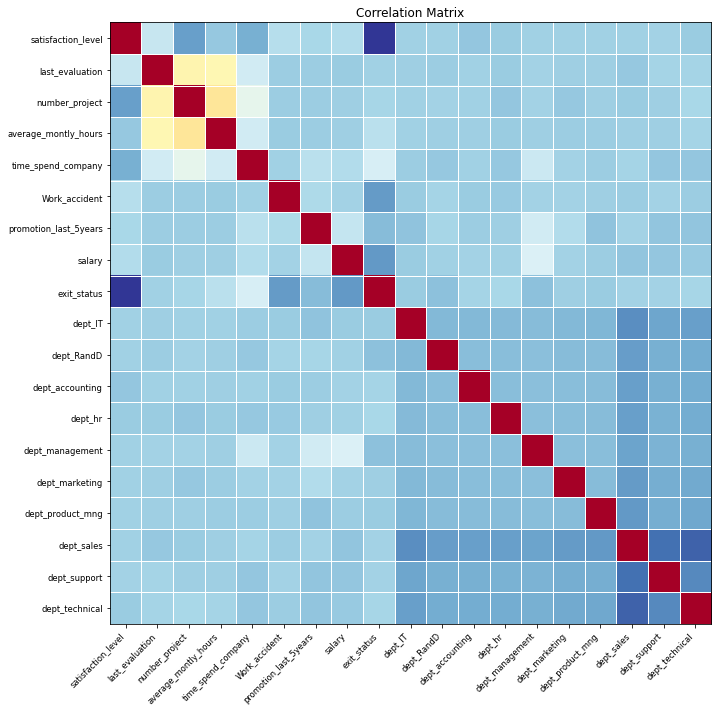

In [18]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111);
plot_corr(employee_list_dummies.corr(), xnames = employee_list_dummies.corr().columns, ax = ax);

In [19]:
correlation_table = employee_list_dummies.corr()
correlation_table['exit_status']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary                  -0.157898
exit_status              1.000000
dept_IT                 -0.010925
dept_RandD              -0.046596
dept_accounting          0.015201
dept_hr                  0.028249
dept_management         -0.046035
dept_marketing          -0.000859
dept_product_mng        -0.011029
dept_sales               0.009923
dept_support             0.010700
dept_technical           0.020076
Name: exit_status, dtype: float64

From the correlation heatmap above, the dark red represents strong positive correlation(1) while the deep blue represent a strong negative correlation(-1) for the two intersecting features.
We can deduce that there are negative correlations between exit_status and satisfaction_level, work_accident, promotion_last_5years as well as salary. This implies:
<ol>
    <li>Much staff are resigning because they aren't satisfied with the company.</li>
    <li>More staff that doesn't have a work related accident are leaving.</li>
    <li>Some few staff that were not promoted in the last 5 years are resigning</li>
    <li>More of the lower paid staff are resigning.</li>
</ol>

However, (2) can't be considered as a reason for staff attrition. Hence, the type of employees that are leaving are: 

<strong>Employees that are disatisfied with their jobs because they are not paid enough and haven't been promoted for the last  5years.</strong>

## 2. Which employees are prone to leave next

To get the list of employees that are prone to leave the company next, we will filter the existing_employees table for satisfaction_level < 0.5, employees not promoted in the last 5 years and employees that their salary is "low'.

In [20]:
prone_to_leave = existing_employees[(existing_employees['satisfaction_level']<0.5) &\
                                    (existing_employees['promotion_last_5years']==0) &\
                                    (existing_employees['salary']=='low')]
print(prone_to_leave['Emp ID'].count(), "employees are prone to leave the company next!")
#prone_to_leave.head()

910 employees are prone to leave the company next!


We can now export this to a CSV file that will be sent to the human resource department to use for staff engagement. 

In [21]:
#export the list of those that are prone to leave to a csv file
prone_to_leave.to_csv('prone_to_leave.csv', index=False)

## 3. Recommendations

The HR of the company should take the following steps to minimize the attrition rate:
* Investigate the causes of employee dissatisfaction and strife to address those.
* Promote employees that are due for promotion in the last 5 years
* They should also look at reviewing the salary structure.